In [1]:
# GENERAL LIBRARIES
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
import argparse
from datetime import datetime
# MACHINE LEARNING LIBRARIES
import numpy as np
import tensorflow as tf
# CUSTOM LIBRARIES
from utils.tools import read_yaml, Logger
from utils.trainer import Trainer

# LOAD CONFIG 
#parser = argparse.ArgumentParser(description='Process some input')
#parser.add_argument('--config', default='utils/config.yaml', type=str, help='Config path', required=False)    
#parser.add_argument('--infer','-i', action='store_true', help='Run inference on a model') 
#parser.add_argument('--benchmark','-b', action='store_true', help='Run a benchmark') 
#parser.add_argument('--search','-s', action='store_true', help='Run a random search')


class Args:
    def __init__(self):
        self.config = "utils/config.yaml"
        self.infer = False
        self.benchmark = False
        self.search = False
    
args = Args() #parser.parse_args()
config = read_yaml(args.config)

config['LEGACY']=True

config['DATASET']='openpose_legacy'

for entry in ['MODEL_DIR','RESULTS_DIR','LOG_DIR']:
    if not os.path.exists(config[entry]):
        os.mkdir(config[entry])

now = datetime.now()
logger = Logger(config['LOG_DIR']+now.strftime("%y%m%d%H%M%S")+'.txt')


# SET GPU 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[config['GPU']], 'GPU')
tf.config.experimental.set_memory_growth(gpus[config['GPU']], True)


# SET TRAINER
trainer = Trainer(config, logger)

if args.benchmark:
    # RUN BENCHMARK
    trainer.do_benchmark()
elif args.infer:
    trainer.do_inference()
elif args.search:
    # RUN RANDOM SEARCH
    trainer.do_random_search()
else:
    print('Nothing to do! Specify one of the following arguments:')
    print('\t --benchmark [-b]: run a benchmark')
    print('\t --search [-s]: run a random search')

Nothing to do! Specify one of the following arguments:
	 --benchmark [-b]: run a benchmark
	 --search [-s]: run a random search


In [2]:
trainer.get_data()

X_train shape: (12562, 30, 52)
y_train shape: (12562,)
X_test shape: (2867, 30, 52)
y_test shape: (2867,)


2023-05-03 18:36:28.098747: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 141086400 exceeds 10% of free system memory.
2023-05-03 18:36:28.216167: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 141086400 exceeds 10% of free system memory.


In [3]:
#trainer.ds_train
trainer.get_model()

In [4]:
tf.print(trainer.ds_train)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 30, 52), dtype=tf.float64, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None))>


In [5]:
#for tensor1, tensor2 in trainer.ds_val:
#  tf.print("First tensor:")
#  tf.print(tensor1)
#  tf.print("Second tensor:")
#  tf.print(tensor2)
onn = []
rnd = 1
ind = 0
#tf.print("Size tensor:", tf.shape( trainer.ds_train ) ) 
for tensor1, tensor2 in trainer.ds_train:
  tf.print("Size of first tensor:", tf.shape(tensor1) ) #, tensor1[0,:,:][0] )
  #tf.print("Size of 2 tensor:", tf.shape(tensor2) ) #, tensor1[0,:,:][0] )
  if ind == rnd:
      onn.append( tensor1[:,:,:][-1])
      print( tensor2[0] )
      print("label", np.argmax(tensor2[0].numpy()) )
      break
  #tf.print("Size of second tensor:", tf.shape(tensor2))
  #tf.print(tensor2[0,:])
  ind+=1
print("onn", np.shape(onn))

2023-05-03 18:36:31.042011: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 141086400 exceeds 10% of free system memory.


Size of first tensor: [512 30 52]
Size of first tensor: [512 30 52]
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(20,), dtype=float32)
label 7
onn (1, 30, 52)


In [6]:
#onn[0].numpy()
np.shape(onn[0])

TensorShape([30, 52])

In [7]:
np.shape(onn)

(1, 30, 52)

In [8]:
#arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
arr = onn
result = []

for i in range(0, len(arr), 4):
    #result.append(arr[i])
    if i + 1 < len(arr):
        result.append( (arr[i], arr[i+1]) )

#print(result)
print(len(result))



len(onn[0][0])

arrr=[]

for i in range(2,len(onn[0][0]), 4):
    #print(i,onn[0][0][i].numpy())
    arrr.append(onn[0][0][i].numpy())
print("min",min(arrr))
print("max",max(arrr))


arrr = onn[0][0][38:].numpy()
#print("min",min(arrr))
#print("max",max(arrr))  

print( np.shape(onn) )
print( (onn[0][0]) )

0
min -0.5854612713428361
max 0.46933254456848505
(1, 30, 52)
tf.Tensor(
[-0.00604903 -0.21649122  0.29973583 -0.02754853  0.44442864 -0.30250781
  0.46933254 -0.71595029 -0.22928049  0.00401961 -0.58546127 -0.36480913
 -0.63163183 -0.58732596  0.28922082  0.99490878  0.20562128  1.64096348
  0.17141249  2.38216134 -0.09359201  0.94598395 -0.05384209  1.68142331
 -0.03506258  2.38502204 -0.01173653  0.03140099  0.02849355 -0.0230227
  0.07815607 -0.04823648  0.05413157  0.00947732 -0.00360377  0.05443672
 -0.00998286  0.08180077 -0.130331    0.0784717   0.00337161  0.01982113
  0.01914591 -0.01424457 -0.02386268  0.04325454 -0.03437688  0.05203351
  0.02224157  0.01668604  0.06667291  0.01137693], shape=(52,), dtype=float64)


In [12]:
#arr2 = onn.numpy()
#xx = arr2[0:13]
#yy = arr2[13:26]

print( "onn shape", np.shape(onn) )
#xx = arr2[26:39]
#yy = arr2[39:52]

#print( np.shape(xx) )
#print( np.shape(yy) )

res = []

item = onn[0]
print("one", np.shape(item) )
for one in item:
    xx=[]
    yy=[]
    
    for i in range(0, len(one), 4):
        if i + 1 < len(one):
            xx.append( one.numpy()[i] )
            yy.append( one.numpy()[i+1] )
    #        #result.append( (arr[i], arr[i+1]) )
    
    #xx = one.numpy()[0:13]
    #yy = one.numpy()[13:26]
    #xx = one.numpy()[26:39]
    #yy = one.numpy()[39:]
    temp=[]
    for i in range(13):
        temp.append( [xx[i],yy[i]] )
    res.append(temp)
    
    
print( 'res',np.shape(res) )

print('res[0]', len(res[0]))

print("min", min(min(res)))
print("max", max(max(res)))

onn shape (1, 30, 52)
one (30, 52)
res (30, 13, 2)
res[0] 13
min [-0.5189977358540506, 0.8870425403661766]
max [0.7908971532566378, 0.1672357146666472]


In [15]:
import matplotlib.pyplot as plt

def draw_skeleton(keypoints,figsize=(8,8)):
    # Define the connections between the keypoints
    #connections = [(0,1), (1,2), (2,3), (3,4), (1,5), (5,6), (6,7), (1,8), (8,9), (9,10), (10,11), (8,12)]
    #connections = [(0,1), (1,2), (2,3), (0,4), (4,5), (5,6), (0,7), (7,8), (8,9), (9,10), (10,11), (8,12)]
    #connections = [(0,1), (1,2), (2,3), (3,4), (0,5), (5,6), (6,7), (7,8), (0,9), (9,10), (10,11), (11,12),]
    connections = [(0,1), (1,2), (2,3), (3,4), (1,5), (5,6), (6,7), (7,8), (1,9), (9,10), (10,11)]
    
    # Create a new figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Loop through the connections and draw the skeleton
    for connection in connections:
        start_point = keypoints[connection[0]]
        end_point = keypoints[connection[1]]
        ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 'b-', linewidth=2)
    
    # Set the x and y limits
    x_min, x_max = min([p[0] for p in keypoints]), max([p[0] for p in keypoints])
    y_min, y_max = min([p[1] for p in keypoints]), max([p[1] for p in keypoints])
    ax.set_xlim([x_min-1, x_max+1])
    ax.set_ylim([y_max+1, y_min-1])
    
    # Turn off the axis labels
    ax.axis('off')
    
    # Show the figure
    plt.show()
    
def draw_skeleton2(points,figsize=(8,8)):
    fig, ax = plt.subplots(figsize=figsize)
    labels = np.arange(len(points))
    offset = -0.05
    # Define the bone connections
    #bones = [ (0,1), (1,2), (2,3), (0,4), (4,5), (5,6), (0,7), (7,8), (8,9), (0,10), (10,11), (11,12) ]
    if len(points)==13:
        #bones = [ (0,1), (1,2), (2,3), (0,4), (4,5), (5,6), (0,7), (7,8), (8,9), (0,10), (10,11), (11,12) ]
        bones = [ (0,1), (1,2), (1,4), (2,3), (0,4), (4,5), (5,6), (1,7), (7,8), (8,9), (7,10), (4,10), (10,11), (11,12) ]
        
    else:
        bones = [ (0,1), (1,2), (2,3), (3,4), (1,5), (5,6), (6,7), (1,8), (8,9), (9,10), (10,11), (8,12), (12,13), (13,14) ]
        #bones = [ (0,1), (1,2), (2,3), (3,4), (1,5), (5,6), (6,7), (2,9), (5,12), (8,9), (9,10), (10,11), (8,12), (12,13), (13,14) ]
    # Draw the bones
    for bone in bones:
        x = [points[bone[0]][0], points[bone[1]][0]]
        y = [points[bone[0]][1], points[bone[1]][1]]
        ax.plot(x, y, linewidth=2, color='red')

    # Draw the keypoints
    for i in range(len(points)):
        x, y = points[i]
        ax.scatter(x, y, s=50, color='blue')
        
    for i, label in enumerate(labels):
        ax.text(points[i][0], points[i][1]  + offset , label, ha='center', va='center')

    # Set the x and y limits
    x_min = min(points, key=lambda x: x[0])[0] - .5
    x_max = max(points, key=lambda x: x[0])[0] + .5
    y_min = min(points, key=lambda x: x[1])[1] - .5
    y_max = max(points, key=lambda x: x[1])[1] + .5
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    plt.gca().invert_yaxis()
    # Show the plot
    plt.show()

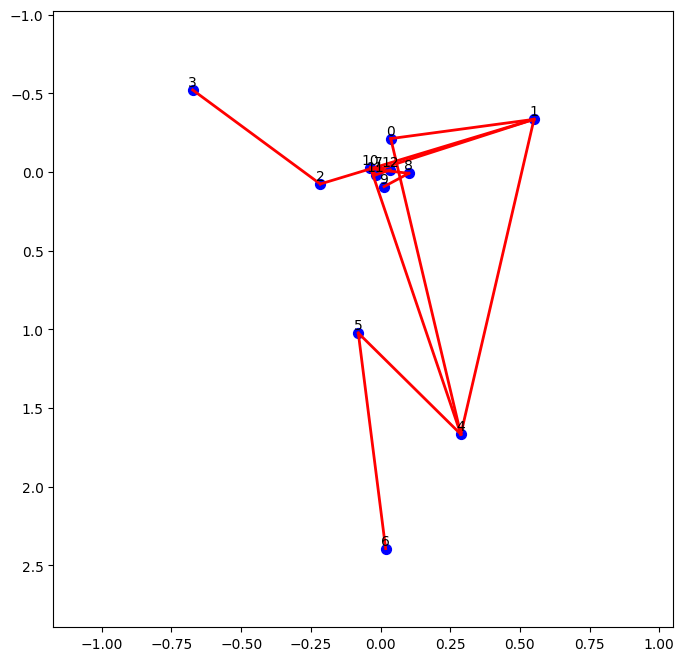

In [16]:
draw_skeleton2(res[1])

In [510]:
#len(result)

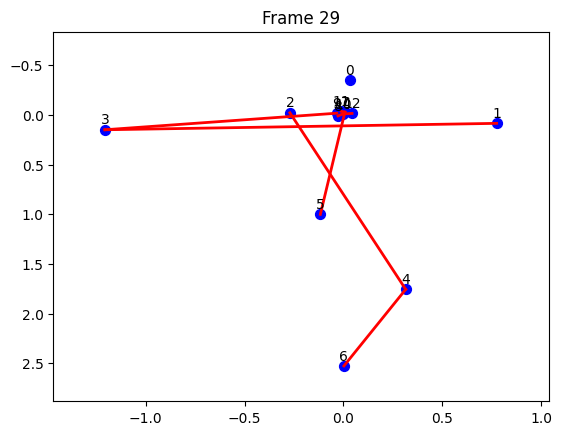

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline 

# Define your 30 frames of 13 points each in a 3D numpy array
#frames = np.random.rand(30, 13, 2) * 100

frames= np.array(res)


# Define a function that will update the plot for each frame of the animation
def animate(i):
    plt.cla() # Clear the previous plot
    # Plot the 13 points for the i-th frame
    x = frames[i,:,0]
    y = frames[i,:,1]
    plt.scatter(x, y, s=50, color='blue')
    
    labels = np.arange(len(frames[i,:,0]))
    offset = -0.1
    kp=len(frames[i,:,0])
    
    for j, label in enumerate(labels):
        plt.text(x[j], y[j]  + offset , label, ha='center', va='center')
    
    
    #bones = [ (0,1), (1,2), (2,3), (0,4), (4,5), (5,6), (0,7), (7,8), (8,9), (0,10), (10,11), (11,12) ]
    #bones = [ (0,1), (1,2), (1,4), (2,3), (0,4), (4,5), (5,6), (1,7), (7,8), (8,9), (7,10), (4,10), (10,11), (11,12) ]
    bones = [ (8,10), (10,12), (2,4), (4,6), (1,3),(3,9), (5,7), (7,11) ] # (0,4), (4,5), (5,6), (1,7), (7,8), (8,9), (7,10), (4,10), (10,11), (11,12) ]
    
    # Draw the bones
    for bone in bones:
        x = [frames[i,bone[0],[0]], frames[i,bone[1],[0]]]
        y = [frames[i,bone[0],[1]], frames[i,bone[1],[1]]]
        plt.plot(x, y, linewidth=2, color='red')
    # Set the x and y limits
    x_min = np.min(frames[:,:,0]) - .25
    x_max = np.max(frames[:,:,0]) + .25
    y_min = np.min(frames[:,:,1]) - .25
    y_max = np.max(frames[:,:,1]) + .25
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])
    
    # Set the plot title
    plt.title(f"Frame {i}")
    plt.gca().invert_yaxis()
    


# Create the animation using the FuncAnimation function
ani = animation.FuncAnimation(plt.gcf(), animate, frames=range(30), interval=100)
from IPython.display import HTML
#HTML(ani.to_jshtml())
#ani.save('animation.mp4', writer='ffmpeg', fps=30)
# Show the animation
#plt.show()

html = ani.to_html5_video()
HTML(html)